# Handwritten Digit Classification

When you deposit a check in an ATM, how does the machine recognize the amount on the check?

<img src="data/check.jpeg" width="400" />

The US Postal Service uses the zip code to sort mail automatically. How does it recognize the zip code on the envelope?

<img src="data/envelope.png" width="400" />

One of the early successes of machine learning was solving this problem of handwritten digit classification.

In this notebook, you will train a machine learning model on the same MNIST data set. This dataset is an example of **image data**.

## Exercise 0

The training data is available at https://datasci112.stanford.edu/data/mnist/train.csv. Read in this training data.

How are the digits represented? What is each row? What are the columns?

In [22]:
# ! cd data && wget https://datasci112.stanford.edu/data/mnist/train.csv

import pandas as pd

df = pd.read_csv("data/train.csv")
df

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
4995       0       0       0       0       0       0       0       0       0   
4996       0       0       0       0       0       0       0       0       0   
4997       0       0       0       0       0       0       0       0       0   
4998       0       0       0       0       0       0       0       0       0   
4999       0       0       0       0       0       0       0       0       0   

      pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
4995        0  ...         0         0         0         0         0   
4996        0  ...         0         0         0         0         0   
4997        0  ...         0         0         0         0         0   
4998        0  ...         0         0         0         0         0   
4999        0  ...         0         0         0         0         0   

      pixel781  pixel782  pixel783  pixel784  class  
0            0         0         0         0      3  
1            0         0         0         0      4  
2            0         0         0         0      1  
3            0         0         0         0      1  
4            0         0         0         0      1  
...        ...       ...       ...       ...    ...  
4995         0         0         0         0      2  
4996         0         0         0         0      6  
4997         0         0         0         0      6  
4998         0         0         0         0      9  
4999         0         0         0         0      4  

[5000 rows x 785 columns]

Let's view image 0 in this data set. To do this, we need to grab the 784 pixels and reshape it to a $28 \times 28$ image.

- You can reshape a Pandas `Series` to a 2D array by calling `Series.values.reshape(nrow, ncol)`.
- You can view a 2D array as an image using the function `plt.imshow()`. (If you want to view the image on the original grayscale, specify `cmap="gray"`. The available colormaps are listed [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).)

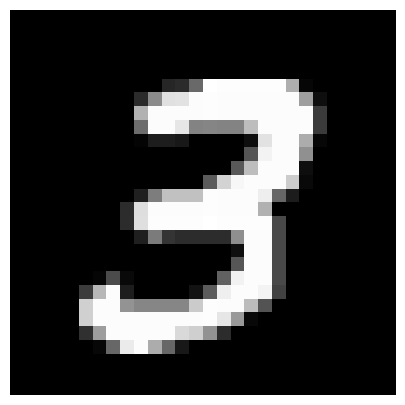

In [23]:
import matplotlib.pyplot as plt

# drop the class column
df_image = df.drop(labels="class", axis=1)

plt.figure(figsize=(10, 5))
plt.imshow(df_image.iloc[0, :].values.reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

## Exercise 1

Train a 10-nearest neighbors model to predict the digit. (You do not need to scale the features because they are already on roughly the same scale.)

What is the training accuracy?

In [24]:
# create the 10-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

X_train = df_image.values
y_train = df["class"].values

classifier = KNeighborsClassifier(n_neighbors=10, metric="euclidean")

classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [25]:
# cross-validation for the classifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train, cv=10)
scores.mean()
# training accuracy: 0.92

np.float64(0.9274000000000001)

## Exercise 2

Make a confusion matrix of the training predictions. Which two digits are most frequently confused?

Display a couple of the misclassified digits. Can you see why they were misclassified?

In [26]:
# check count of training examples per class
df.groupby('class').size()

class
0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
dtype: int64

In [ ]:
# Split the data into training and validation datasets
df_train = df.groupby('class').sample(frac=0.5)
df_val = df.drop(df_train.index)

In [58]:
# create the 10-nearest neighbors classifier using training data
from sklearn.neighbors import KNeighborsClassifier

X_train = df_train.drop('class', axis=1).values
y_train = df_train['class'].values

classifier = KNeighborsClassifier(n_neighbors=10, metric="euclidean")

classifier.fit(X_train, y_train)

# predict the validation set
X_val = df_val.drop('class', axis=1).values
y_true = df_val['class'].values
y_pred = classifier.predict(X_val)

In [38]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm

array([[238,   1,   0,   0,   1,   3,   6,   1,   0,   0],
       [  0, 249,   0,   0,   0,   0,   0,   0,   1,   0],
       [  3,  18, 206,   0,   1,   5,   1,  12,   3,   1],
       [  0,   7,   1, 229,   0,   7,   0,   5,   0,   1],
       [  1,   9,   2,   0, 220,   0,   0,   0,   0,  18],
       [  2,  12,   0,   3,   1, 220,   4,   0,   1,   7],
       [  4,   6,   0,   0,   0,   0, 240,   0,   0,   0],
       [  2,  10,   1,   0,   4,   0,   0, 227,   0,   6],
       [  2,  16,   1,  10,   2,  11,   2,   3, 195,   8],
       [  1,   1,   0,   3,   3,   1,   0,   9,   1, 231]])

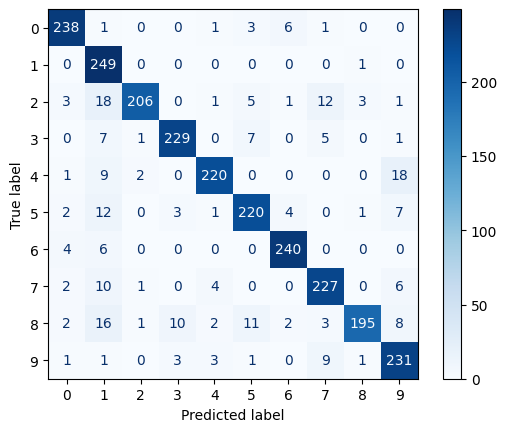

In [42]:
# visualize confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap='Blues')
plt.show()

Predicted label: 7, True label: 3


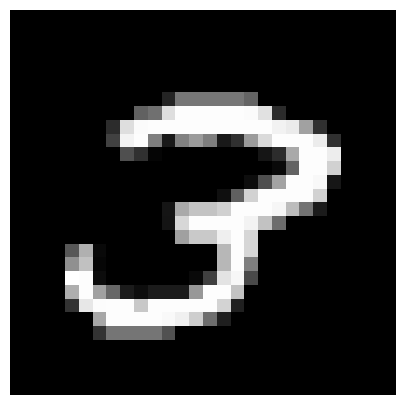

Predicted label: 1, True label: 7


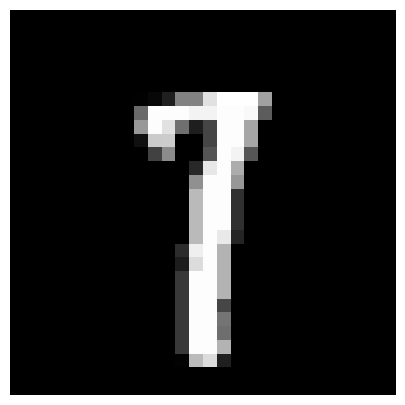

Predicted label: 3, True label: 8


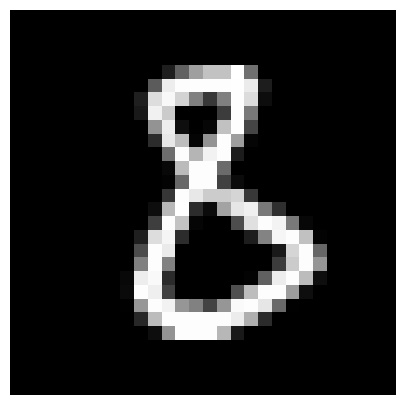

Predicted label: 9, True label: 4


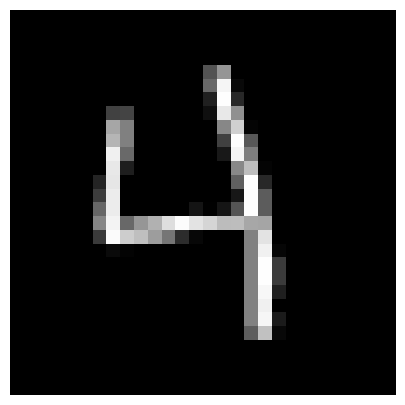

Predicted label: 1, True label: 6


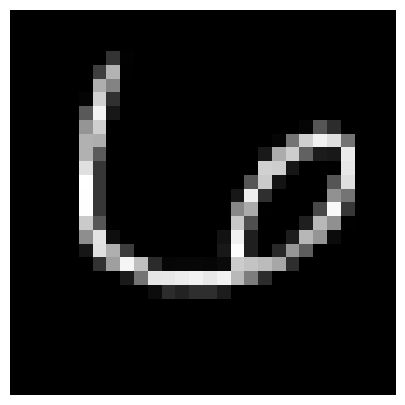

In [ ]:
# display some misclassified examples

df_val['y_pred'] = y_pred
misclassified = df_val.loc[df_val['class'] != df_val['y_pred']].head(5)
misclassified_image = misclassified.drop(['class', 'y_pred'], axis=1)

for i in range(misclassified.shape[0]):
    print(f"Predicted label: {misclassified['y_pred'].iloc[i]}, True label: {misclassified['class'].iloc[i]}")
    plt.figure(figsize=(10, 5))
    plt.imshow(misclassified_image.iloc[i, :].values.reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.show()

## üìä ÌòºÎèô ÌñâÎ†¨ (Confusion Matrix) by Copilot

ÌòºÎèô ÌñâÎ†¨ÏùÄ Î∂ÑÎ•ò Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌïú ÌëúÎ°ú, Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÏôÄ Ïã§Ï†ú Í∞íÏùÑ ÎπÑÍµêÌïòÏó¨ Ïñ¥Îñ§ Ï¢ÖÎ•òÏùò Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÎäîÏßÄÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï§çÎãàÎã§.

### üîπ Íµ¨ÏÑ± ÏöîÏÜå
|Ïã§Ï†ú / ÏòàÏ∏°	 |Positive ÏòàÏ∏°	 |Negative ÏòàÏ∏°           |  
|---------------|-------------------|-------------------|
|Ïã§Ï†ú Positive	 |TP (True Positive) |FN (False Negative)|
|Ïã§Ï†ú Negative	 |FP (False Positive)|TN (True Negative)  |

- **TP (True Positive):** Ïã§Ï†úÎèÑ Positive, ÏòàÏ∏°ÎèÑ Positive
- **TN (True Negative):** Ïã§Ï†úÎèÑ Negative, ÏòàÏ∏°ÎèÑ Negative
- **FP (False Positive):** Ïã§Ï†úÎäî Negative, ÏòàÏ∏°ÏùÄ Positive (1Ï¢Ö Ïò§Î•ò)
- **FN (False Negative):** Ïã§Ï†úÎäî Positive, ÏòàÏ∏°ÏùÄ Negative (2Ï¢Ö Ïò§Î•ò)

### üìê Ï£ºÏöî ÌèâÍ∞Ä ÏßÄÌëú
- **Ï†ïÌôïÎèÑ (Accuracy)**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Ï†ïÎ∞ÄÎèÑ (Precision)** 

$$ 
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Ïû¨ÌòÑÏú® (Recall)** 

$$ 
\text{Recall} = \frac{TP}{TP + FN} 
$$

- **F1 Ï†êÏàò (F1-Score)**

$$ 
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} 
$$

- **ÌäπÏù¥ÎèÑ (Specificity)** 

$$
 \text{Specificity} = \frac{TN}{TN + FP} 
$$

### üê∂ ÏòàÏãú: Í∞ïÏïÑÏßÄ Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò

|               | ÏòàÏ∏°: Í∞ïÏïÑÏßÄ | ÏòàÏ∏°: Í∞ïÏïÑÏßÄ ÏïÑÎãò |
|---------------|--------------|-------------------|
| Ïã§Ï†ú: Í∞ïÏïÑÏßÄ   | TP           | FN                |
| Ïã§Ï†ú: Í∞ïÏïÑÏßÄ ÏïÑÎãò | FP           | TN                |

### üìå Ï∞∏Í≥†

ÌòºÎèô ÌñâÎ†¨ÏùÄ ÌäπÌûà ÌÅ¥ÎûòÏä§ Î∂àÍ∑†ÌòïÏù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Îçî Ï†ïÌôïÌûà ÌèâÍ∞ÄÌï† Ïàò ÏûàÎäî ÎèÑÍµ¨ÏûÖÎãàÎã§. Ï†ïÌôïÎèÑ Ïô∏ÏóêÎèÑ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1 Ï†êÏàò Îì±ÏùÑ Ìï®Íªò Í≥†Î†§Ìï¥Ïïº Ìï©ÎãàÎã§.


## Exercise 3

Determine the optimal value of $k$ in terms of accuracy.

<Axes: >

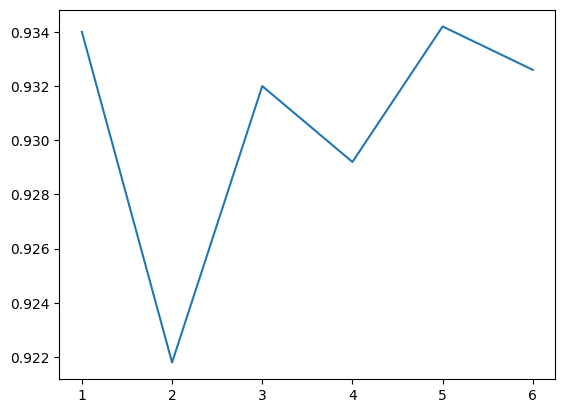

In [ ]:
# find the best value of k

# create the 10-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

X_train = df_image.values
y_train = df["class"].values

k_values, test_accuracies = range(1, 7), []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    scores = cross_val_score(
        classifier, X_train, y_train, 
        scoring='accuracy', cv=10
    )
    test_accuracies.append(scores.mean())

pd.Series(test_accuracies, index=k_values).plot()


In [69]:
# do grid search
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(
    classifier,
    param_grid={
        'n_neighbors': range(1, 7),
        'metric': ['euclidean', 'manhattan']
    },
    scoring='accuracy',
    cv=10
)

grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

Í≤∞Î°† :
- Ï†úÏùº optimalÌïú metricÏùÄ euclidean 
- Ï†úÏùº optimalÌïú kÍ∞íÏùÄ 5

## Exercise 4

Read in the test data, available at https://datasci112.stanford.edu/data/mnist/test.csv.

Use the best model from Exercise 3 to classify these digits. How would you check these predictions?

In [71]:
# ! cd data && wget https://datasci112.stanford.edu/data/mnist/test.csv

import pandas as pd

X_test = pd.read_csv("data/test.csv")
X_test

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
4995       0       0       0       0       0       0       0       0       0   
4996       0       0       0       0       0       0       0       0       0   
4997       0       0       0       0       0       0       0       0       0   
4998       0       0       0       0       0       0       0       0       0   
4999       0       0       0       0       0       0       0       0       0   

      pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
4995        0  ...         0         0         0         0         0   
4996        0  ...         0         0         0         0         0   
4997        0  ...         0         0         0         0         0   
4998        0  ...         0         0         0         0         0   
4999        0  ...         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  pixel784  
0            0         0         0         0         0  
1            0         0         0         0         0  
2            0         0         0         0         0  
3            0         0         0         0         0  
4            0         0         0         0         0  
...        ...       ...       ...       ...       ...  
4995         0         0         0         0         0  
4996         0         0         0         0         0  
4997         0         0         0         0         0  
4998         0         0         0         0         0  
4999         0         0         0         0         0  

[5000 rows x 784 columns]

In [ ]:
# predict the class of a test dataset
from sklearn.neighbors import KNeighborsClassifier

X_train = df.drop("class", axis=1)
y_train = df["class"]

# use the beet model from Exercise 3
classifier = KNeighborsClassifier(**grid_cv.best_params_)

classifier.fit(X=X_train, y=y_train)

y_test = classifier.predict(X_test)

Predicted label: 6


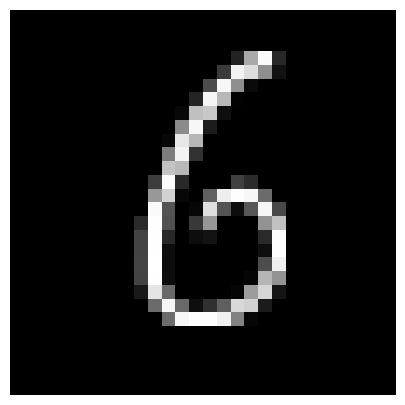

Predicted label: 0


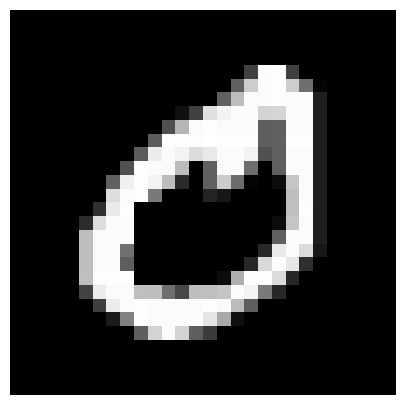

Predicted label: 2


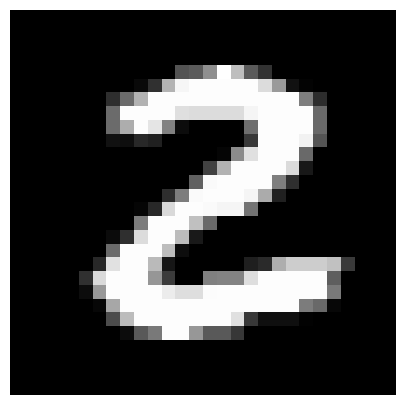

Predicted label: 9


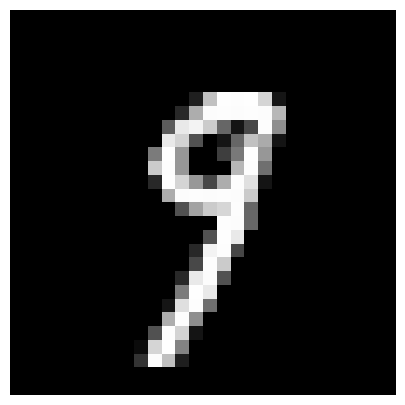

Predicted label: 4


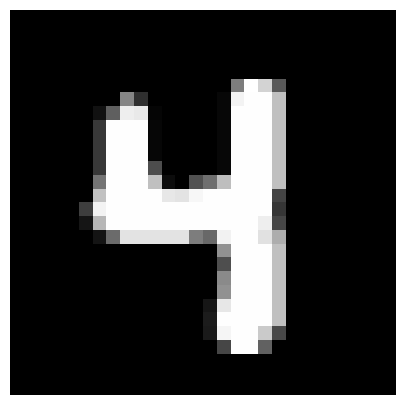

Predicted label: 4


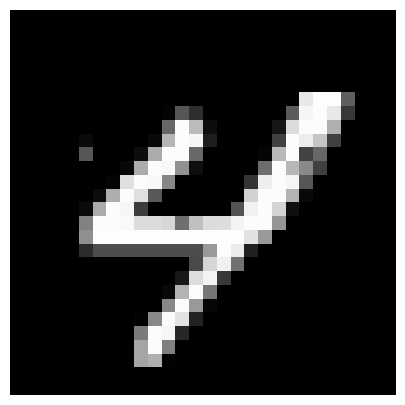

Predicted label: 4


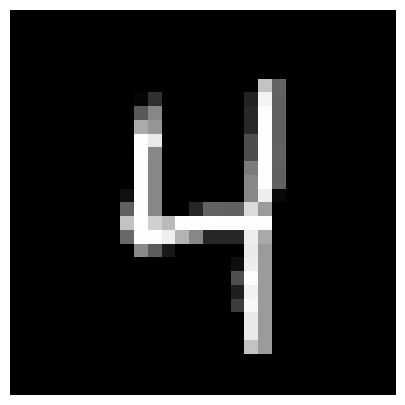

Predicted label: 1


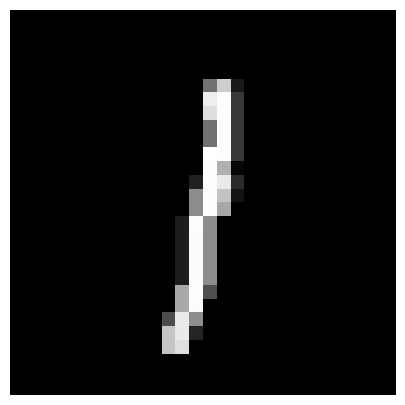

Predicted label: 1


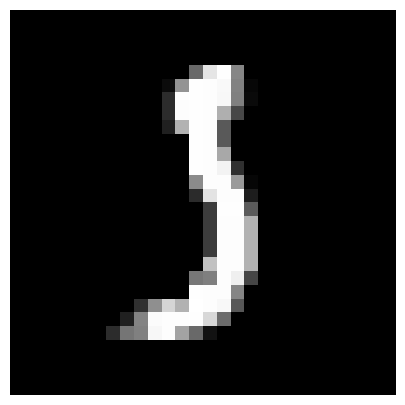

Predicted label: 1


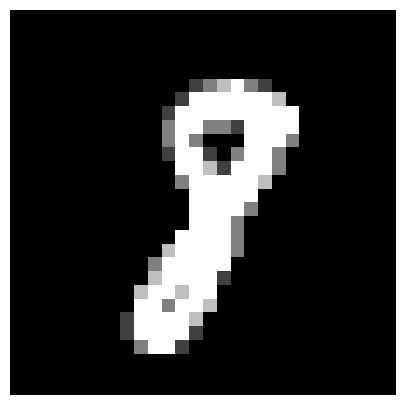

In [79]:
# display some examples

X_test['pred_class'] = y_test

for i in range(0, 10):
    print(f"Predicted label: {X_test['pred_class'].iloc[i]}")
    plt.figure(figsize=(10, 5))
    plt.imshow(X_test.iloc[i, :-1].values.reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.show()

## üìä ÎùºÎ≤® ÏóÜÎäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î∂ÑÎ•ò Î™®Îç∏ ÌèâÍ∞Ä Î∞©Î≤ï by Copilot

ÎùºÎ≤®Ïù¥ ÏóÜÎäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Î∂ÑÎ•ò(Classification) Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïòÎäî Ï£ºÏöî Î∞©Î≤ïÎì§Í≥º Í∑∏ Ïû•Îã®Ï†êÏùÑ ÏïÑÎûòÏóê Ï†ïÎ¶¨ÌñàÏäµÎãàÎã§.

---

### üß™ 1. ÏòàÏ∏° Î∂ÑÌè¨ Î∂ÑÏÑù

- **ÏÑ§Î™Ö**: Î™®Îç∏Ïùò ÏòàÏ∏° ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨Í∞Ä ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ÏôÄ Ïú†ÏÇ¨ÌïúÏßÄ ÌôïÏù∏
- **Ïû•Ï†ê**:
  - ÎùºÎ≤® ÏóÜÏù¥ÎèÑ Î™®Îç∏Ïùò Ìé∏Ìñ• ÌÉêÏßÄ Í∞ÄÎä•
  - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄÏùò ÏùºÍ¥ÄÏÑ± ÌôïÏù∏
- **Îã®Ï†ê**:
  - Ïã§Ï†ú ÏÑ±Îä•ÏùÄ Ïïå Ïàò ÏóÜÏùå
  - ÌÅ¥ÎûòÏä§ ÎπÑÏú®Ïù¥ Î∂àÍ∑†ÌòïÌïú Í≤ΩÏö∞ Ìï¥ÏÑù Ïñ¥Î†§ÏõÄ

---

### üìä 2. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∏∞Î∞ò ÌèâÍ∞Ä

- **ÏÑ§Î™Ö**: ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌõÑ Íµ¨Ï°∞Ï†Å ÏùºÍ¥ÄÏÑ± ÌôïÏù∏ (t-SNE, PCA Îì± ÌôúÏö©)
- **Ïû•Ï†ê**:
  - ÌÅ¥ÎûòÏä§ Í∞Ñ/ÎÇ¥ Ïú†ÏÇ¨ÏÑ± ÏãúÍ∞ÅÌôî Í∞ÄÎä•
  - Î™®Îç∏Ïùò Íµ¨Ï°∞Ï†Å ÏùºÍ¥ÄÏÑ± ÌôïÏù∏
- **Îã®Ï†ê**:
  - ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌíàÏßàÏù¥ Ï£ºÍ¥ÄÏ†Å
  - Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Ìï¥ÏÑùÏù¥ Ïñ¥Î†§ÏõÄ

---

### üß† 3. Ï†ÑÎ¨∏Í∞Ä Í≤ÄÌÜ† ÎòêÎäî ÏÉòÌîåÎßÅ

- **ÏÑ§Î™Ö**: ÏùºÎ∂Ä ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏÇ¨ÎûåÏù¥ ÏßÅÏ†ë Í≤ÄÌÜ†ÌïòÍ±∞ÎÇò ÏÜåÎüâ ÎùºÎ≤®ÎßÅÌïòÏó¨ ÌèâÍ∞Ä
- **Ïû•Ï†ê**:
  - Ïã§Ï†ú ÌíàÏßà ÌôïÏù∏ Í∞ÄÎä•
  - ÏÜåÎüâ ÎùºÎ≤®ÎßÅÏúºÎ°ú Ï†ïÎüâÏ†Å ÌèâÍ∞Ä Í∞ÄÎä•
- **Îã®Ï†ê**:
  - ÏãúÍ∞Ñ/ÎπÑÏö© ÏÜåÎ™® ÌÅº
  - ÏÉòÌîåÏù¥ Ï†ÑÏ≤¥Î•º ÎåÄÌëúÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏùå

---

### üîÅ 4. Î™®Îç∏ Í∞Ñ ÎπÑÍµê

- **ÏÑ§Î™Ö**: ÎèôÏùºÌïú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Ïó¨Îü¨ Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÍ≥† ÏòàÏ∏° Í≤∞Í≥ºÏùò ÏùºÍ¥ÄÏÑ± ÎπÑÍµê
- **Ïû•Ï†ê**:
  - Ïó¨Îü¨ Î™®Îç∏Ïùò ÏòàÏ∏° ÏùºÍ¥ÄÏÑ± ÌôïÏù∏
  - ÏÉÅÎåÄÏ†Å ÏÑ±Îä• Ï∂îÏ†ï Í∞ÄÎä•
- **Îã®Ï†ê**:
  - Î™®Îëê ÏûòÎ™ªÎêú ÏòàÏ∏°Ïùº ÏàòÎèÑ ÏûàÏùå
  - Í∏∞Ï§Ä Î™®Îç∏Ïù¥ ÌïÑÏöîÌï®

---

### üéØ 5. ÌôïÎ•† Í∏∞Î∞ò Î∂ÑÏÑù

- **ÏÑ§Î™Ö**: Î™®Îç∏Ïù¥ Ï∂úÎ†•Ìïú ÌÅ¥ÎûòÏä§ ÌôïÎ•† Î∂ÑÌè¨Î•º Î∂ÑÏÑùÌïòÏó¨ Í≥ºÎèÑÌïú ÌôïÏã†Ïù¥ÎÇò Î∂àÌôïÏã§ÏÑ± ÌÉêÏßÄ
- **Ïû•Ï†ê**:
  - Î™®Îç∏Ïùò ÌôïÏã†ÎèÑ Î∂ÑÏÑù Í∞ÄÎä•
  - Í≥ºÏ†ÅÌï© Ïó¨Î∂Ä ÌÉêÏßÄ Í∞ÄÎä•
- **Îã®Ï†ê**:
  - ÌôïÎ•†Ïù¥ ÎÜíÎã§Í≥† Ìï¥ÏÑú Ï†ïÌôïÌïòÎã§Îäî Î≥¥Ïû•ÏùÄ ÏóÜÏùå
  - Ìï¥ÏÑùÏù¥ Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏùå

---

> Ï∞∏Í≥†: ÏòàÏ∏° Î∂ÑÌè¨ Î∂ÑÏÑùÏùÄ GoogleÏùò [Î®∏Ïã†Îü¨Îãù ÌÅ¨ÎûòÏãú ÏΩîÏä§](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=ko)ÏóêÏÑú ÏÜåÍ∞úÎêú Í∞úÎÖêÏûÖÎãàÎã§.

